# Analyse météo tunisienne

Dans le cadre de notre projet, nous allons analyser les données météorologiques tunisiennes de l'année 1983 à 2023. 

In [30]:
# importer les librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
# lire le fichier csv
data = pd.read_csv(r'Data_set/Cleaned_Data.csv')

In [32]:
# afficher le fichier csv
data

,YEAR,MO,DY,T2M,T2MDEW,T2M_MAX,T2M_MIN,TS,WS10M,WD10M,WS50M,WD50M,PS,PRECTOTCORR,RH2M
0,1983,1,1,5.48,-0.01,13.02,-0.81,4.48,2.43,263.62,3.73,265.12,98.23,0.11,70.38
1,1983,1,2,5.80,1.58,12.84,0.74,4.75,3.12,264.19,4.79,263.56,98.09,0.07,76.56
2,1983,1,3,5.43,3.12,11.65,0.27,4.99,3.73,212.50,6.01,212.62,98.47,0.16,84.56
3,1983,1,4,7.59,3.09,14.50,2.96,6.81,3.09,302.56,4.49,303.19,98.57,0.07,75.50
4,1983,1,5,9.02,0.41,18.82,3.52,8.19,4.40,285.00,7.34,285.31,98.22,0.00,58.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14818,2023,7,28,32.46,16.51,42.51,23.64,35.21,4.52,194.25,5.59,197.81,96.77,0.00,45.12
14819,2023,7,29,35.83,11.48,46.36,24.97,37.42,5.73,210.88,7.56,212.00,96.61,0.00,33.69
14820,2023,7,30,34.77,17.39,44.59,27.04,37.63,1.55,141.94,1.70,142.75,96.73,10.23,40.62
14821,2023,7,31,32.71,16.79,39.90,26.26,35.37,1.86,110.81,2.50,112.00,96.71,0.00,41.38


In [33]:
# afficher le sommaire du fichier csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14823 entries, 0 to 14822
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         14823 non-null  int64  
 1   MO           14823 non-null  int64  
 2   DY           14823 non-null  int64  
 3   T2M          14823 non-null  float64
 4   T2MDEW       14823 non-null  float64
 5   T2M_MAX      14823 non-null  float64
 6   T2M_MIN      14823 non-null  float64
 7   TS           14823 non-null  float64
 8   WS10M        14823 non-null  float64
 9   WD10M        14823 non-null  float64
 10  WS50M        14823 non-null  float64
 11  WD50M        14823 non-null  float64
 12  PS           14823 non-null  float64
 13  PRECTOTCORR  14823 non-null  float64
 14  RH2M         14823 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 1.7 MB


In [34]:
# afficher la structure du fichier
data.shape

(14823, 15)

## Data Cleaning

Dans cette étape, nous avons supprimé toutes les lignes ayant au moins une valeur manquante ou au moins une valeur nulle et les lignes dupliquées.
Ensuite, nous avons renommé les paramètres pour plus de clarté.

In [35]:
# Rechercher les valeurs manquantes
missing_values = data.isnull().sum()
print(missing_values)

YEAR           0
MO             0
DY             0
T2M            0
T2MDEW         0
T2M_MAX        0
T2M_MIN        0
TS             0
WS10M          0
WD10M          0
WS50M          0
WD50M          0
PS             0
PRECTOTCORR    0
RH2M           0
dtype: int64


In [36]:
# Supprimer les valeurs manquantes (dans notre cas on a pas de valeurs manquantes)
cleaned_data = data.dropna()

In [37]:
# Rechercher les lignes en double
duplicate_rows = cleaned_data.duplicated().sum()
print(f"nombre des lignes en double: {duplicate_rows}")

nombre des lignes en double: 0


In [38]:
# Supprimer les lignes en double (dans notre cas on a pas aussi de lignes en double)
cleaned_data = cleaned_data.drop_duplicates()

In [39]:
# Check data types of columns
print(cleaned_data.dtypes)

YEAR             int64
MO               int64
DY               int64
T2M            float64
T2MDEW         float64
T2M_MAX        float64
T2M_MIN        float64
TS             float64
WS10M          float64
WD10M          float64
WS50M          float64
WD50M          float64
PS             float64
PRECTOTCORR    float64
RH2M           float64
dtype: object


In [40]:
# renommer les colonnes
mydata = cleaned_data.rename(columns={
    'YEAR': 'Année',
    'MO': 'Mois',
    'DY': 'Jour',
    'T2M': 'Température_2m',
    'T2MDEW': 'Point_de_Rosée_Température_2m',
    'T2M_MAX': 'Température_2m_Max',
    'T2M_MIN': 'Température_2m_Min',
    'TS': 'Température_Surface',
    'WS10M': 'Vitesse_Vent_10m',
    'WD10M': 'Direction_Vent_10m',
    'WS50M': 'Vitesse_Vent_50m',
    'WD50M': 'Direction_Vent_50m',
    'PS': 'Pression_Surface',
    'PRECTOTCORR': 'Précipitation_Totale_Corrigée',
    'RH2M': 'Humidité_Relative_2m'
})

In [41]:
mydata.columns

Index(['Année', 'Mois', 'Jour', 'Température_2m',
       'Point_de_Rosée_Température_2m', 'Température_2m_Max',
       'Température_2m_Min', 'Température_Surface', 'Vitesse_Vent_10m',
       'Direction_Vent_10m', 'Vitesse_Vent_50m', 'Direction_Vent_50m',
       'Pression_Surface', 'Précipitation_Totale_Corrigée',
       'Humidité_Relative_2m'],
      dtype='object')

## Analyse Temporelle

### Variation Annuelle

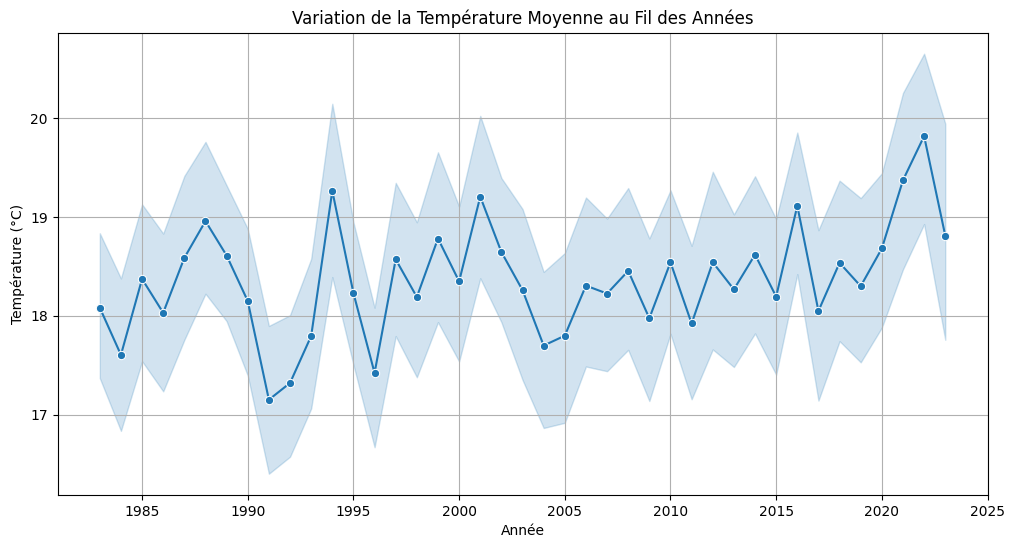

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Année', y='Température_2m', data=mydata, marker='o', linestyle='-')
plt.xlabel('Année')
plt.ylabel('Température (°C)')
plt.title('Variation de la Température Moyenne au Fil des Années')
plt.grid(True)
plt.show()

Le graphe illustre l'évolution annuelle de la température moyenne en Tunisie qui varie entre 4°C et 36°C, reflétant les saisons et les fluctuations climatiques normales. Cependant, des années spécifiques telles que 2010, 2017, 2018, 2021 et 2023 se démarquent, affichant une moyenne de température dépassant les 36°C. Cette tendance suggère des épisodes de chaleur intense ou des périodes de canicule au cours de ces années particulières.

De plus, une observation significative est que la température moyenne semble augmenter progressivement au fil des ans. Cette tendance à la hausse indique un réchauffement climatique potentiel ou des changements dans les schémas météorologiques à long terme, ce qui pourrait avoir des implications importantes.

### Variation Mensuelle

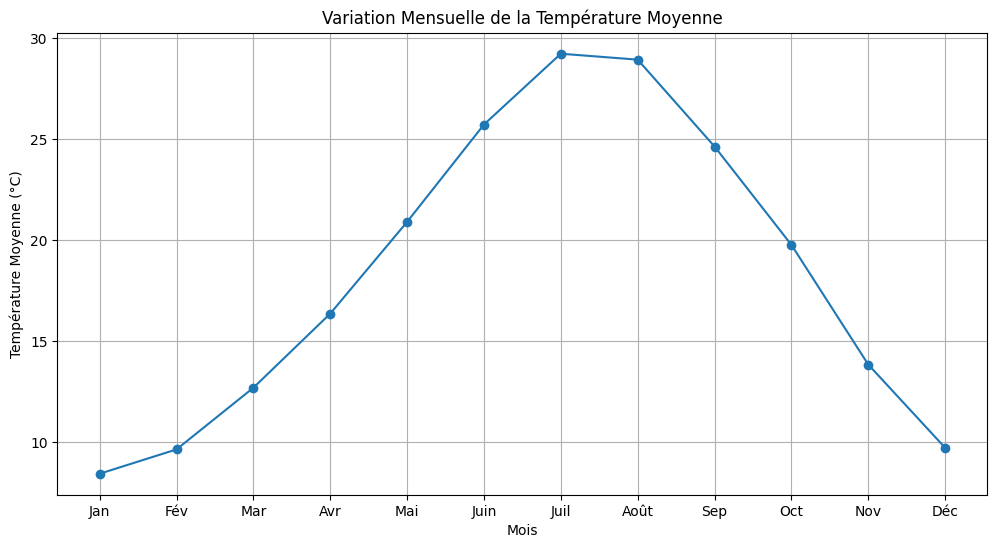

In [43]:
# Group data by month and calculate monthly averages
monthly_data = mydata.groupby('Mois').mean()

# Plot monthly variations of Temperature_2m
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Température_2m'], marker='o', linestyle='-')
plt.xlabel('Mois')
plt.ylabel('Température Moyenne (°C)')
plt.title('Variation Mensuelle de la Température Moyenne')
plt.xticks(ticks=monthly_data.index, labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.grid(True)

Le graphique illustre les variations mensuelles de la température moyenne en Tunisie tout au long de l'année. En général, la température fluctue entre 5°C et 29°C. Le mois de janvier marque le début de l'année avec des températures relativement basses, et au fur et à mesure que l'on avance vers le mois de juin, la température augmente progressivement pour atteindre son pic.

Juin est souvent le mois le plus chaud de l'année. Ensuite, on observe une légère diminution de la température en août, probablement due à des facteurs météorologiques saisonniers.

Après août, la température commence à chuter progressivement, atteignant un point bas vers décembre, ce qui correspond à la période hivernale. Cette tendance reflète les changements saisonniers typiques dans le climat tunisien, avec des variations de température qui suivent un schéma prévisible tout au long de l'année.

In [45]:
# Copier les données originales pour ne pas les modifier
season_data = mydata.copy()

# Définir les saisons en fonction des mois
season_data['Saison'] = 'Hiver'
season_data.loc[(season_data['Mois'] >= 3) & (season_data['Mois'] <= 5), 'Saison'] = 'Printemps'
season_data.loc[(season_data['Mois'] >= 6) & (season_data['Mois'] <= 8), 'Saison'] = 'Été'
season_data.loc[(season_data['Mois'] >= 9) & (season_data['Mois'] <= 11), 'Saison'] = 'Automne'

# Calculer les statistiques saisonnières
seasonal_stats = season_data.groupby('Saison').agg({
    'Température_2m': ['mean', 'min', 'max'],
    'Vitesse_Vent_10m': ['mean', 'min', 'max'],
    'Précipitation_Totale_Corrigée': ['mean', 'sum']
})
print(seasonal_stats)


          Température_2m               Vitesse_Vent_10m               \
                    mean    min    max             mean   min    max   
Saison                                                                 
Automne        19.414453   4.83  32.50         3.596464  1.08  13.20   
Hiver           9.249425   1.46  20.59         4.260180  1.15  14.61   
Printemps      16.654202   3.80  32.56         4.128818  1.04  13.88   
Été            27.973819  15.13  37.18         3.446408  1.07  11.03   

          Précipitation_Totale_Corrigée           
                                   mean      sum  
Saison                                            
Automne                        1.110956  4043.88  
Hiver                          0.957424  3512.79  
Printemps                      1.113375  4199.65  
Été                            0.534500  2000.10  


Tout d'abord, il est clair que la température moyenne varie considérablement d'une saison à l'autre, avec des pointes atteignant 37.18°C pendant l'été et des baisses à 1.46°C pendant l'hiver. Cette variation témoigne des saisons distinctes que connaît le pays, avec des contrastes marqués entre les mois chauds et froids. 

Parallèlement, la radiation solaire descendante suit également un schéma saisonnier, avec des niveaux plus élevés en été et en automne, suggérant une plus grande exposition au soleil pendant ces saisons. 

En ce qui concerne la vitesse du vent, bien qu'elle reste relativement stable tout au long de l'année, des valeurs légèrement plus élevées sont observées pendant l'hiver. 

Enfin, les précipitations totales corrigées montrent une certaine variabilité saisonnière, avec des moyennes annuelles les plus élevées en automne, suivies de près par le printemps. 

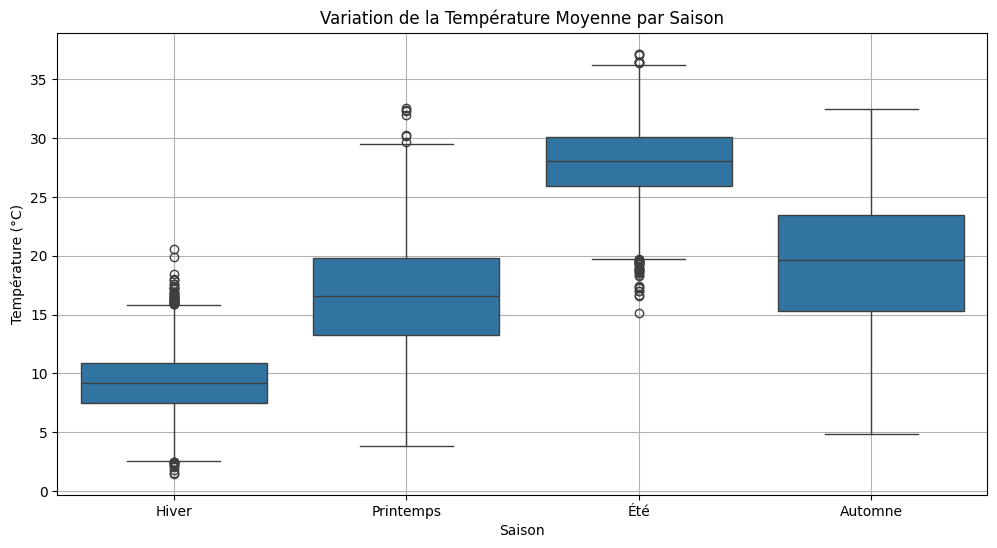

In [46]:
# Graphique de variation saisonnière de la Température_2m
plt.figure(figsize=(12, 6))
sns.boxplot(x='Saison', y='Température_2m', data=season_data, order=['Hiver', 'Printemps', 'Été', 'Automne'])
plt.xlabel('Saison')
plt.ylabel('Température (°C)')
plt.title('Variation de la Température Moyenne par Saison')
plt.grid(True)
plt.show()

## Analyse des Températures:

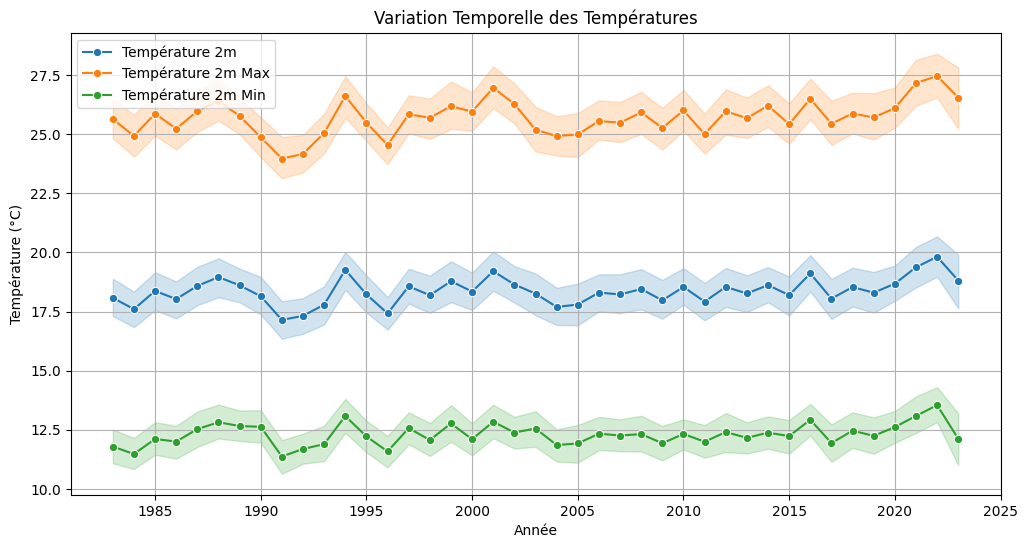

In [47]:
# Graphique de variation temporelle de la Température_2m
plt.figure(figsize=(12, 6))
sns.lineplot(x='Année', y='Température_2m', data=mydata, marker='o', label='Température 2m')
sns.lineplot(x='Année', y='Température_2m_Max', data=mydata, marker='o', label='Température 2m Max')
sns.lineplot(x='Année', y='Température_2m_Min', data=mydata, marker='o', label='Température 2m Min')
plt.xlabel('Année')
plt.ylabel('Température (°C)')
plt.title('Variation Temporelle des Températures')
plt.legend()
plt.grid(True)
plt.show()

### Variation Mensuelle des Températures:

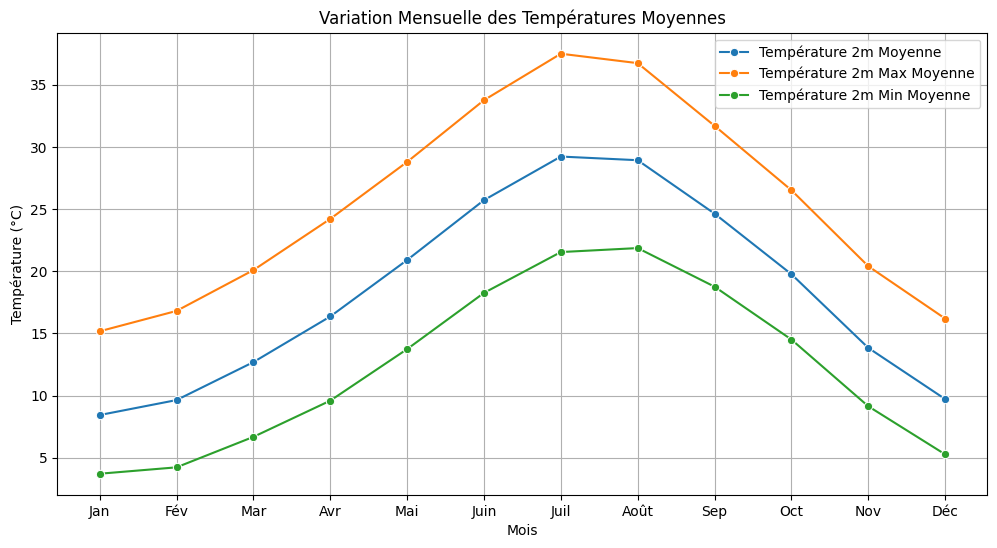

In [48]:
# Calculer les températures mensuelles moyennes, maximales et minimales
monthly_temps = mydata.groupby('Mois').agg({
    'Température_2m': 'mean',
    'Température_2m_Max': 'mean',
    'Température_2m_Min': 'mean'
})

# Graphique de variation mensuelle des Températures
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_temps.index, y='Température_2m', data=monthly_temps, marker='o', label='Température 2m Moyenne')
sns.lineplot(x=monthly_temps.index, y='Température_2m_Max', data=monthly_temps, marker='o', label='Température 2m Max Moyenne')
sns.lineplot(x=monthly_temps.index, y='Température_2m_Min', data=monthly_temps, marker='o', label='Température 2m Min Moyenne')
plt.xlabel('Mois')
plt.ylabel('Température (°C)')
plt.title('Variation Mensuelle des Températures Moyennes')
plt.xticks(ticks=monthly_temps.index, labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.legend()
plt.grid(True)
plt.show()


### Analyse des Événements Météorologiques Extrêmes :

Années et Mois des Vagues de Chaleur :
       Année  Mois
157     1983     6
181     1983     7
212     1983     8
243     1983     9
512     1984     5
...      ...   ...
14488   2022     9
14728   2023     4
14778   2023     6
14791   2023     7
14822   2023     8

[193 rows x 2 columns]


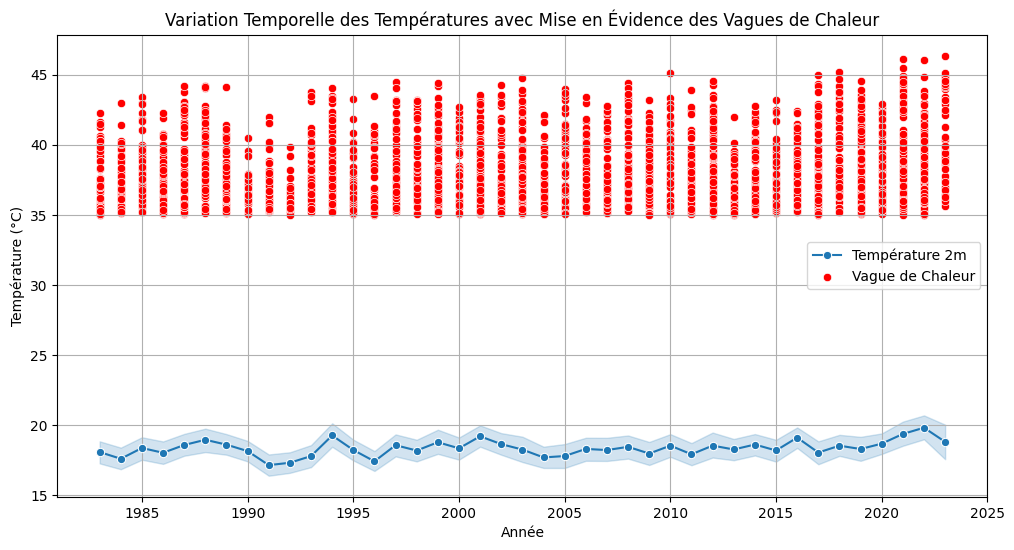

In [49]:
# Identifier les événements météorologiques extrêmes (par exemple, vagues de chaleur)
heatwaves = mydata[mydata['Température_2m_Max'] > 35]  # Définir un seuil de température pour les vagues de chaleur

# Afficher les années et les mois des vagues de chaleur
print("Années et Mois des Vagues de Chaleur :")
print(heatwaves[['Année', 'Mois']].drop_duplicates().sort_values(by=['Année', 'Mois']))

# Graphique de variation temporelle des Températures avec mise en évidence des vagues de chaleur
plt.figure(figsize=(12, 6))
sns.lineplot(x='Année', y='Température_2m', data=mydata, marker='o', label='Température 2m')
sns.scatterplot(x='Année', y='Température_2m_Max', data=heatwaves, color='red', label='Vague de Chaleur')
plt.xlabel('Année')
plt.ylabel('Température (°C)')
plt.title('Variation Temporelle des Températures avec Mise en Évidence des Vagues de Chaleur')
plt.legend()
plt.grid(True)
plt.show()

## Analyse du Vent :

### Variation Temporelle de la Vitesse du Vent :

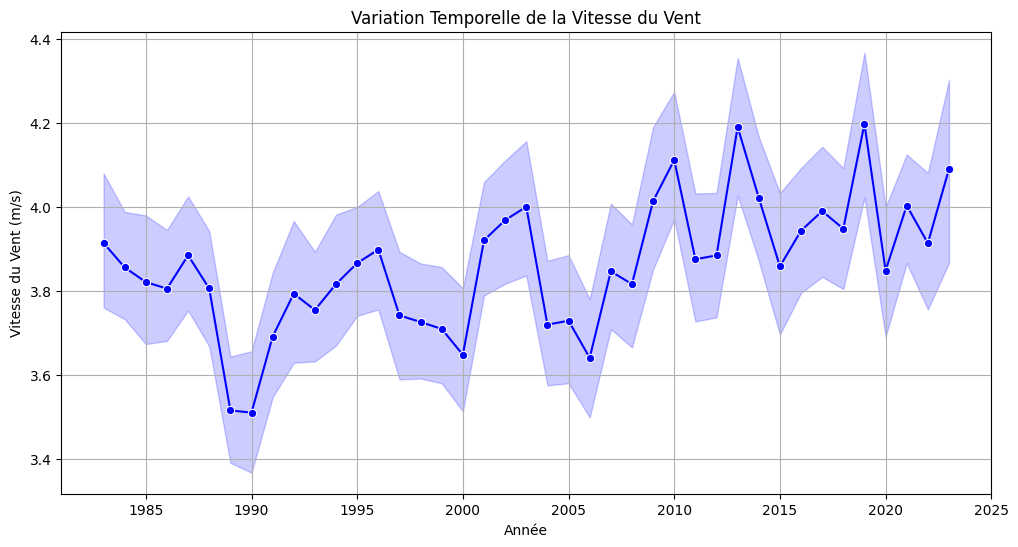

In [50]:
# Graphique de variation temporelle de la Vitesse_Vent_10m(moyenne)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Année', y='Vitesse_Vent_10m', data=mydata, marker='o', color='blue')
plt.xlabel('Année')
plt.ylabel('Vitesse du Vent (m/s)')
plt.title('Variation Temporelle de la Vitesse du Vent')
plt.grid(True)
plt.show()

### Variation Mensuelle de la Vitesse du Vent :

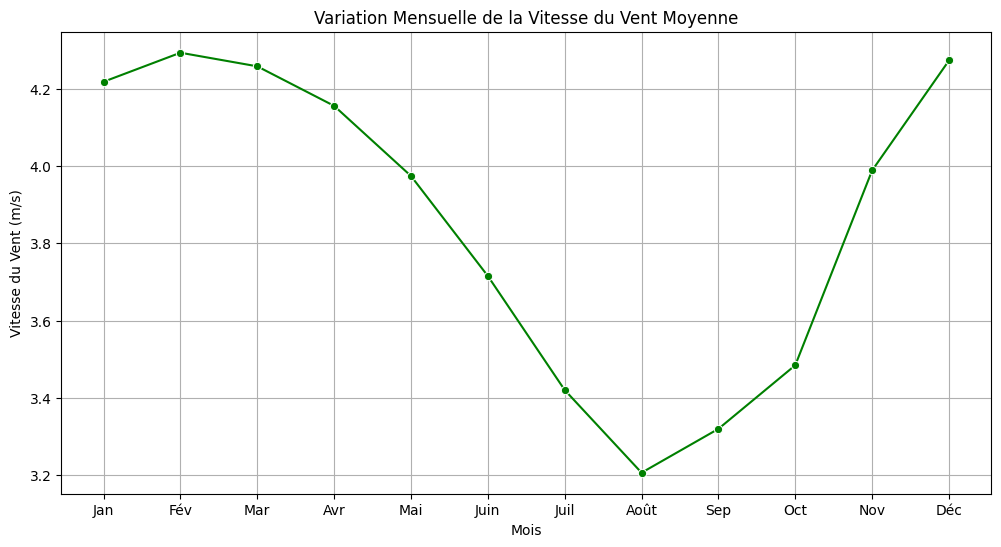

In [51]:
# Calculer les vitesses du vent mensuelles moyennes
monthly_wind = mydata.groupby('Mois').agg({
    'Vitesse_Vent_10m': 'mean'
})

# Graphique de variation mensuelle de la Vitesse du Vent
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_wind.index, y='Vitesse_Vent_10m', data=monthly_wind, marker='o', color='green')
plt.xlabel('Mois')
plt.ylabel('Vitesse du Vent (m/s)')
plt.title('Variation Mensuelle de la Vitesse du Vent Moyenne')
plt.xticks(ticks=monthly_wind.index, labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.grid(True)
plt.show()

### 

## Analyse de la Pression Atmosphérique et de la Précipitation :

### Variation Temporelle de la Pression Atmosphérique :

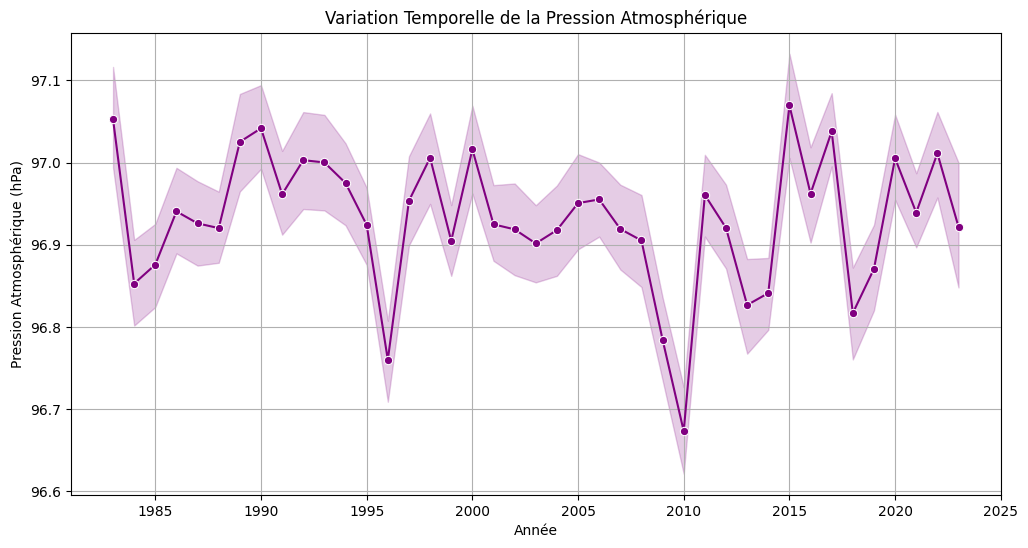

In [52]:
# Graphique de variation temporelle de la Pression_Surface(moyenne)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Année', y='Pression_Surface', data=mydata, marker='o', color='purple')
plt.xlabel('Année')
plt.ylabel('Pression Atmosphérique (hPa)')
plt.title('Variation Temporelle de la Pression Atmosphérique')
plt.grid(True)
plt.show()

### Variation Mensuelle de la Pression Atmosphérique :

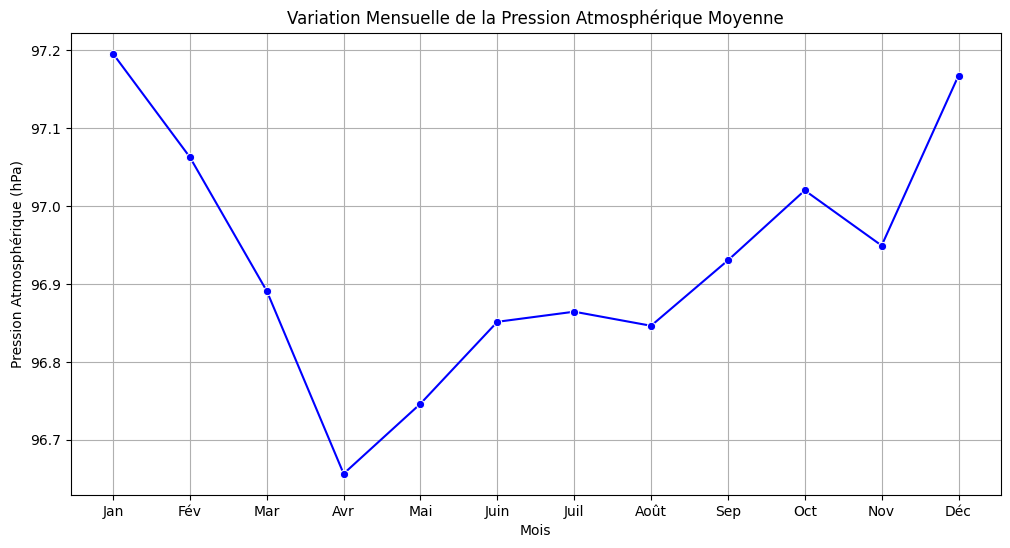

In [53]:
# Calculer les pressions atmosphériques mensuelles moyennes
monthly_pressure = mydata.groupby('Mois').agg({
    'Pression_Surface': 'mean'
})

# Graphique de variation mensuelle de la Pression Atmosphérique
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pressure.index, y='Pression_Surface', data=monthly_pressure, marker='o', color='blue')
plt.xlabel('Mois')
plt.ylabel('Pression Atmosphérique (hPa)')
plt.title('Variation Mensuelle de la Pression Atmosphérique Moyenne')
plt.xticks(ticks=monthly_pressure.index, labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.grid(True)
plt.show()

### Variation Temporelle de la Précipitation :

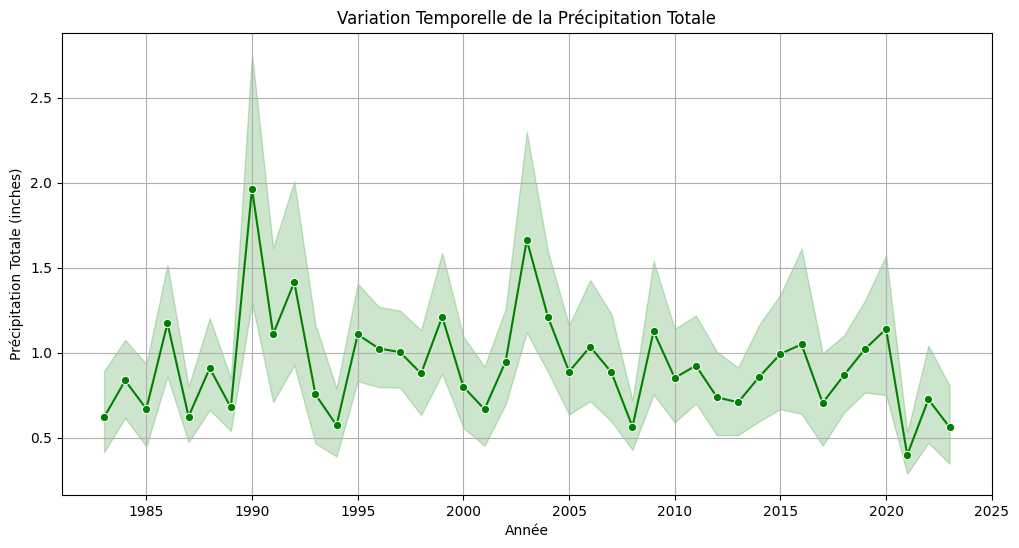

In [65]:
# Graphique de variation temporelle de la Précipitation_Totale_Corrigée
plt.figure(figsize=(12, 6))
sns.lineplot(x='Année', y='Précipitation_Totale_Corrigée', data=mydata, marker='o', color='green')
plt.xlabel('Année')
plt.ylabel('Précipitation Totale (inches)')
plt.title('Variation Temporelle de la Précipitation Totale')
plt.grid(True)
plt.show()

### Variation Mensuelle de la Précipitation :

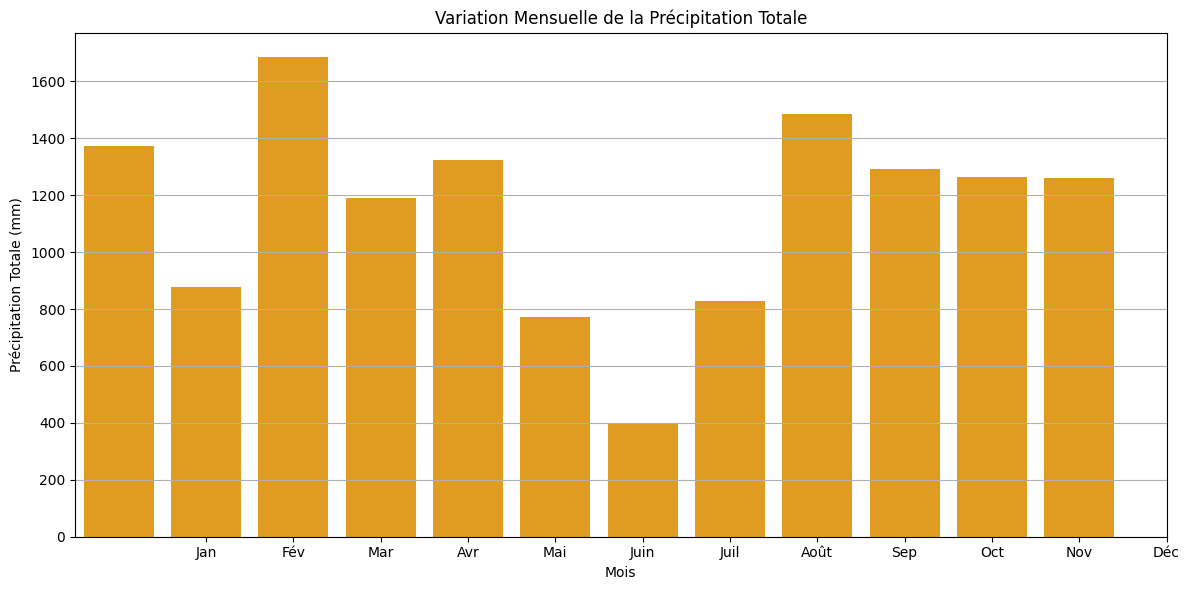

In [66]:
# Calculer les précipitations mensuelles totales
monthly_precipitation = mydata.groupby('Mois').agg({
    'Précipitation_Totale_Corrigée': 'sum'
})

# Graphique de variation mensuelle de la Précipitation Totale
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_precipitation.index, y='Précipitation_Totale_Corrigée', data=monthly_precipitation, color='orange')
plt.xlabel('Mois')
plt.ylabel('Précipitation Totale (mm)')
plt.title('Variation Mensuelle de la Précipitation Totale')
plt.xticks(ticks=monthly_precipitation.index, labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## Etude de Corrélation

### Corrélation entre la vitesse de vent et la precipitation

Corrélation entre la vitesse du vent et la precipitation: 0.1020261466299438


Text(0.5, 1.0, 'Corrélation entre la vitesse du vent et la precipitation')

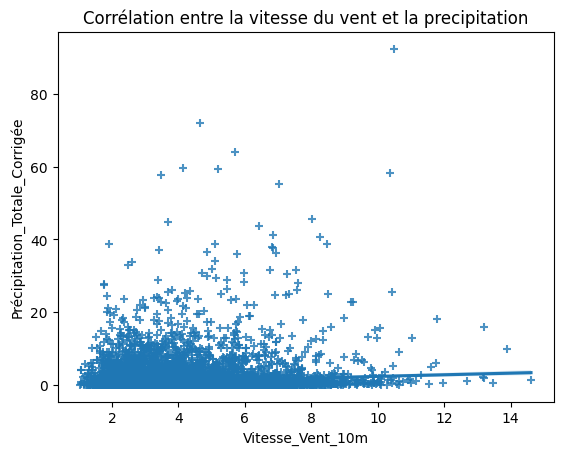

In [67]:
correlation = mydata['Vitesse_Vent_10m'].corr(mydata['Précipitation_Totale_Corrigée'])
print("Corrélation entre la vitesse du vent et la precipitation:", correlation)

# Calcule de correlation entre la vitesse du vent et la precipitation
correlation = mydata['Vitesse_Vent_10m'].corr(mydata['Précipitation_Totale_Corrigée'])

# creation du plot de correlation entre la vitesse du vent et la precipitation
sns.regplot(data=mydata, x='Vitesse_Vent_10m', y='Précipitation_Totale_Corrigée' ,fit_reg=True,marker='+').set_title('Corrélation entre la vitesse du vent et la precipitation')




* <span style="color:cyan">on remarque qu'il existe une corrélation positive faible (0.102) entre la vitesse du vent et la precipitation.</span>

### Corrélation entre la temperature et l humidité relative:

Corrélation entre la temperature et l humidité relative: -0.7276375547702316


Text(0.5, 1.0, 'Corrélation entre la temperature et l humidité relative')

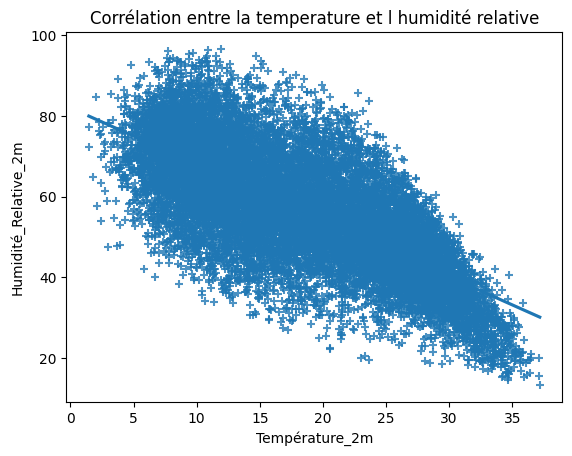

In [68]:
# calcule de correlation
correlation = mydata['Température_2m'].corr(mydata['Humidité_Relative_2m'])
print("Corrélation entre la temperature et l humidité relative:", correlation)

# Creation du plot du correlation entre la temperature et l humidité relative
sns.regplot(data=mydata, x='Température_2m', y='Humidité_Relative_2m',fit_reg=True,marker="+").set_title('Corrélation entre la temperature et l humidité relative')

* <span style="color:cyan">on remarque qu'il existe une corrélation négative forte (-0.727) entre la temperature et l'humidité relative.</span>

### Correlation entre la vitesse du vent et la direction du vent:

correlation entre la vitesse du vent et la direction du vent: 0.2501750975449711


Text(0.5, 1.0, 'correlation entre la vitesse du vent et la direction du vent')

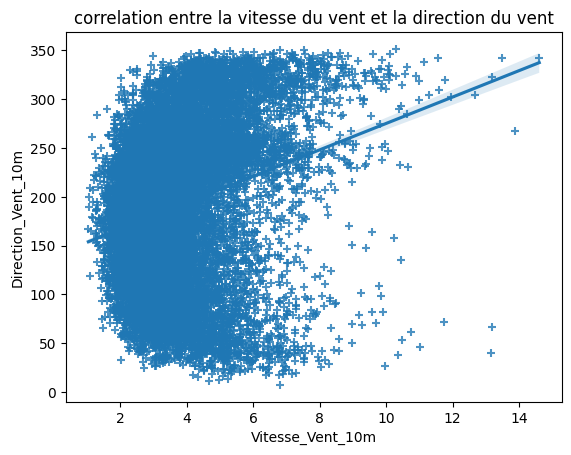

In [69]:
# Calcule de correlation entre la vitesse du vent et la direction du vent
correlation = mydata['Vitesse_Vent_10m'].corr(mydata['Direction_Vent_10m'])
print("correlation entre la vitesse du vent et la direction du vent:", correlation)

# Creation du plot du correlation entre la vitesse du vent et la direction du vent
sns.regplot(data=mydata, x='Vitesse_Vent_10m', y='Direction_Vent_10m',fit_reg=True,marker="+").set_title('correlation entre la vitesse du vent et la direction du vent')

- <span style="color:cyan">on remarque qu'il existe une corrélation positive faible (0.250) entre la vitesse du vent et la direction du vent.</span>

### la matrice de corrélation:

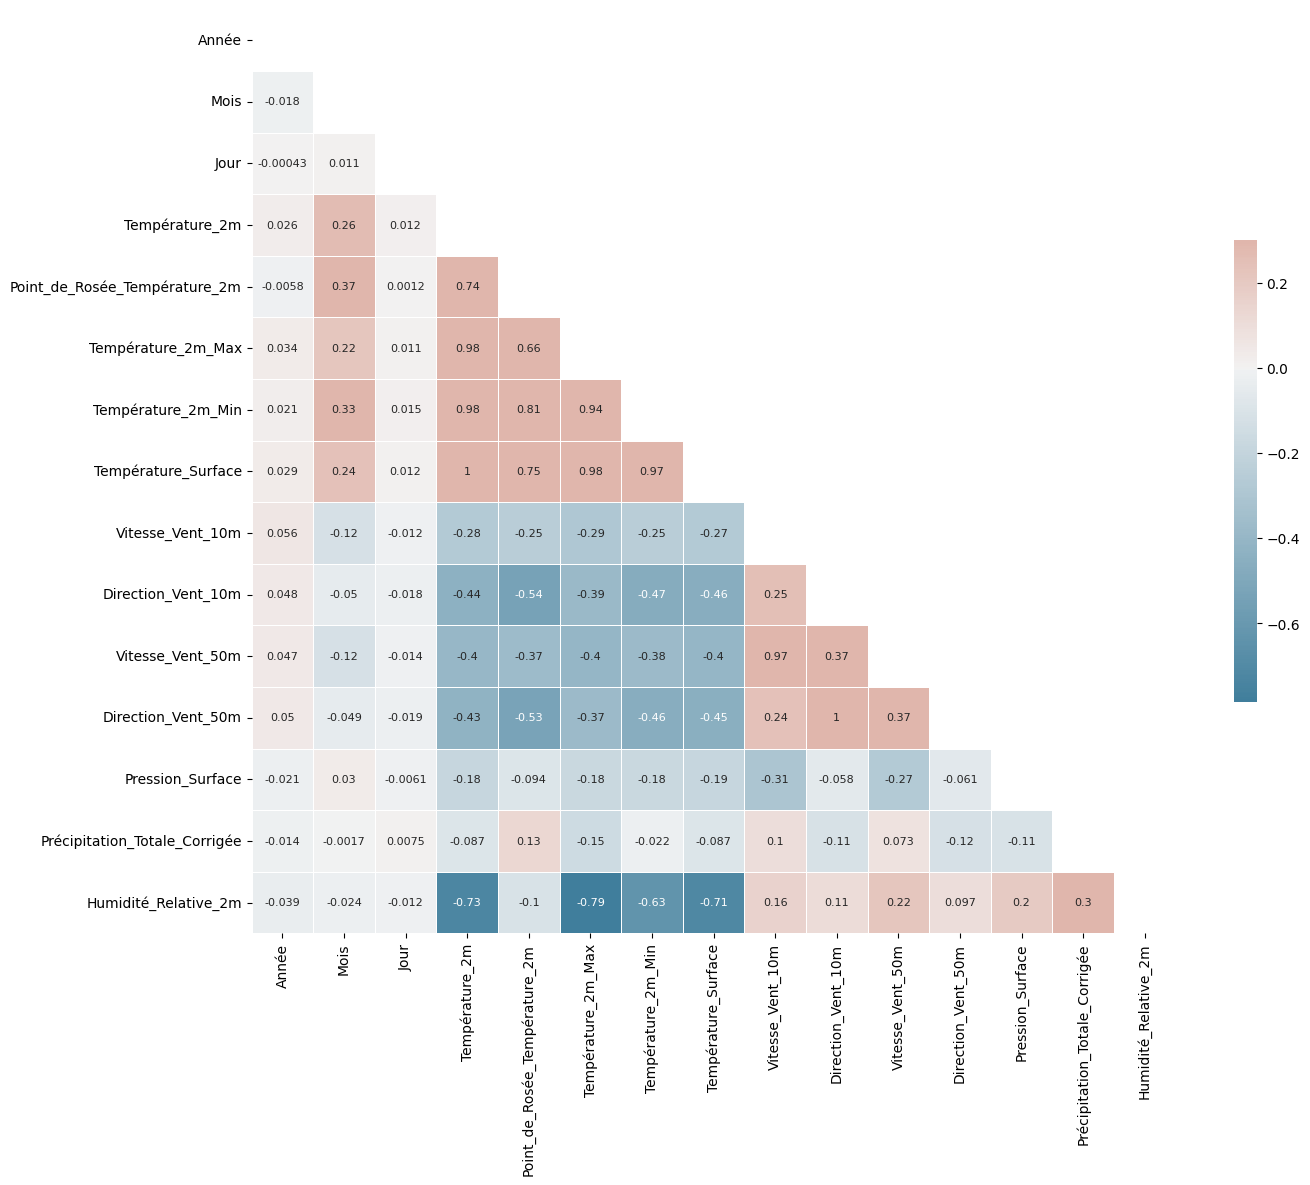

In [70]:
# Calculer la matrice de corrélation
corr = mydata.corr()

# Générer un masque pour le triangle supérieur
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurer la figure matplotlib
f, ax = plt.subplots(figsize=(15, 12))

# Générer une palette de couleurs divergente personnalisée
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dessiner la carte de chaleur avec le masque et le bon rapport d'aspect
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 8})

plt.show()